## Just how far does Bryson DeChambeau hit?

Last weekend, my sweet ginger boyfriend and I went to the BMW Championship in Owings Mill, MD. Aside from the traffic staff guy who threatened to have us arrested for asking where to park if we didn't have a pass, I had a pretty great time despite not being a real golf head. 

One thing stood out to me, which is saying something since I don't really get the intricacies of this stuff. But that thing was Bryson DeChambeau's drive. Its power, its arc, its loud *thwack!* when the face of the wood hits the ball. It's like no one else's, and definitely no one else in the group he was playing with. 

Much has been made of DeChambeau's transformative golf game and abrasive personality. He's golf's first real anti-hero. People treat him as a villain but he has a great respect and love of the game, my boyfriend says, and that's what makes him so ready and willing to find new ways to play that leave everyone else in the dust.

### The project
So, below you'll find me doing some [quick maffs](https://www.youtube.com/watch?v=3M_5oYU-IsU) to find out, is DeChambeau's swing all for show, or is he really the drive master?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("Documents/2021 season driving distances.csv")

## Mapping DeChambeau's Drives

In [3]:
chambeau_only = df[df['PLAYER NAME'] == 'Bryson DeChambeau']
print(round(np.average(chambeau_only['AVG.']),2), 'yards') #DeChambeau's average drive
chambeau_only.head() # Prints just the first few values in the dataframe chambeau_only

322.35 yards


,RANK THIS WEEK,PLAYER NAME,ROUNDS,AVG.,TOTAL DISTANCE,TOTAL DRIVES,TOURNAMENT,Date,Type
0,1,Bryson DeChambeau,4,326.4,"2,611",8,The Northern Trust,Aug 19,FedEx Cup Playoff
152,4,Bryson DeChambeau,4,330.6,"2,645",8,WGC - FedEx St. Judes,Aug 5,WGC
289,4,Bryson DeChambeau,4,305.3,"2,442",8,The Open Championship,July 15,Major
597,10,Bryson DeChambeau,4,306.4,"2,451",8,Travelers Championship,June 28,Standard
668,2,Bryson DeChambeau,4,333.9,"2,671",8,U.S. Open (2021),June 17,Major


[Text(0, 0, 'The Northern Trust'),
 Text(0, 0, 'WGC - FedEx St. Judes'),
 Text(0, 0, 'The Open Championship'),
 Text(0, 0, 'Travelers Championship'),
 Text(0, 0, 'U.S. Open (2021)'),
 Text(0, 0, 'Nationwide Memorial'),
 Text(0, 0, 'PGA Championship'),
 Text(0, 0, 'AT&T Byron Nelson'),
 Text(0, 0, 'Wells Fargo Championship'),
 Text(0, 0, 'Masters (2021)'),
 Text(0, 0, 'Players Championship'),
 Text(0, 0, 'Arnold Palmer Invitational'),
 Text(0, 0, 'WGC - Workday Championship'),
 Text(0, 0, 'Sentry Tournament of Champions'),
 Text(0, 0, 'Masters Tournament (2020)'),
 Text(0, 0, 'Shriners Hospitals for Children Open'),
 Text(0, 0, 'U.S. Open (2020)')]

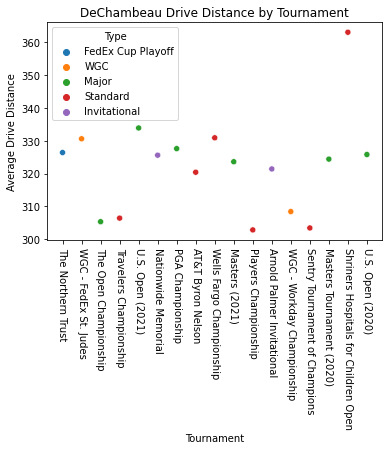

In [4]:
# We love graphs don't we folks
ax = sns.scatterplot(data=chambeau_only, x="Date", y="AVG.", hue="Type")
ax.tick_params(axis='x', rotation=270)
plt.ylabel('Average Drive Distance')
plt.xlabel('Tournament')
plt.title("DeChambeau Drive Distance by Tournament")
ax.set_xticklabels(chambeau_only['TOURNAMENT'])

### Top 15 drives thus far 

How does our sweet boy Bryson compare to the top drives of the 2021 PGA Tour?

In [5]:
top15_drive = np.percentile(df['AVG.'], 99.5)
print(top15_drive)
top_15_drives = df[df['AVG.'] >= top15_drive]

334.3699999999999


Text(0.5, 1.0, 'Distance by Tournament for 99th Percentile Drives')

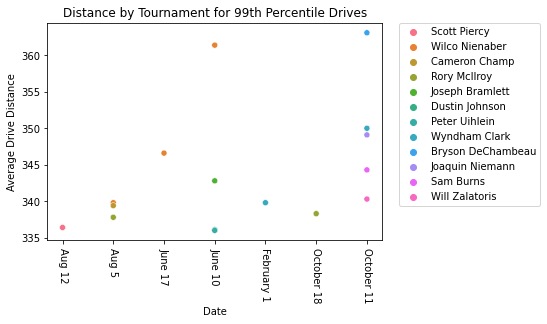

In [6]:
ax = sns.scatterplot(data=top_15_drives, x="Date", y="AVG.", hue="PLAYER NAME")
ax.tick_params(axis='x', rotation=270)
plt.ylabel('Average Drive Distance')
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Distance by Tournament for 99th Percentile Drives")

Hmm, 12 names in the top 15, which means a few people are represented twice. Let's find out who real quick.

In [7]:
top_15_drives

,RANK THIS WEEK,PLAYER NAME,ROUNDS,AVG.,TOTAL DISTANCE,TOTAL DRIVES,TOURNAMENT,Date,Type
75,1,Scott Piercy,4,336.4,"2,691",8,Wyndham Championship,Aug 12,Standard
149,1,Wilco Nienaber,4,339.8,"2,718",8,WGC - FedEx St. Judes,Aug 5,WGC
150,2,Cameron Champ,4,339.4,"2,715",8,WGC - FedEx St. Judes,Aug 5,WGC
151,3,Rory McIlroy,4,337.8,"2,702",8,WGC - FedEx St. Judes,Aug 5,WGC
667,1,Wilco Nienaber,4,346.6,"2,773",8,U.S. Open (2021),June 17,Major
738,1,Wilco Nienaber,4,361.4,"2,891",8,Palmetto Championship at Congaree,June 10,Standard
739,2,Joseph Bramlett,4,342.8,"2,742",8,Palmetto Championship at Congaree,June 10,Standard
740,3,Dustin Johnson,4,336.1,"2,689",8,Palmetto Championship at Congaree,June 10,Standard
741,4,Peter Uihlein,4,336.0,"2,688",8,Palmetto Championship at Congaree,June 10,Standard
2007,1,Wyndham Clark,4,339.8,"2,718",8,Waste Management Phoenix Open,February 1,Standard


Hmm. Hold on while I ask my boyfriend who Wilco Nienaber is... Actually. Better yet. Let's compare him directly to BdC.

### Some quick comparisons

[Text(0, 0, 'The Northern Trust'),
 Text(0, 0, 'WGC - FedEx St. Judes'),
 Text(0, 0, 'The Open Championship'),
 Text(0, 0, 'Travelers Championship'),
 Text(0, 0, 'U.S. Open (2021)'),
 Text(0, 0, 'Nationwide Memorial'),
 Text(0, 0, 'PGA Championship'),
 Text(0, 0, 'AT&T Byron Nelson'),
 Text(0, 0, 'Wells Fargo Championship'),
 Text(0, 0, 'Masters (2021)'),
 Text(0, 0, 'Players Championship'),
 Text(0, 0, 'Arnold Palmer Invitational'),
 Text(0, 0, 'WGC - Workday Championship'),
 Text(0, 0, 'Sentry Tournament of Champions'),
 Text(0, 0, 'Masters Tournament (2020)'),
 Text(0, 0, 'Shriners Hospitals for Children Open'),
 Text(0, 0, 'U.S. Open (2020)'),
 Text(0, 0, 'WGC - FedEx St. Judes')]

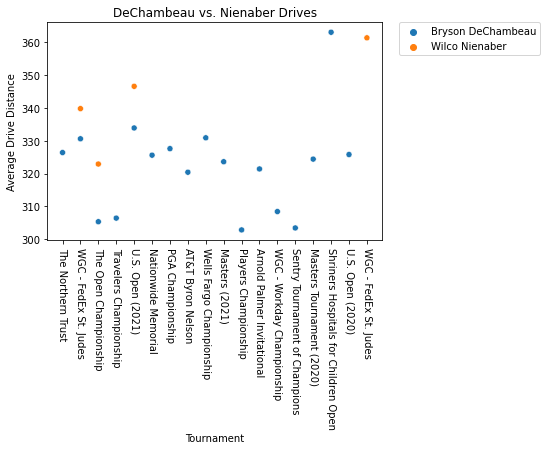

In [8]:
nienaber = df[df['PLAYER NAME'] == 'Wilco Nienaber']
chambeau_vs_nienaber = pd.concat([chambeau_only, nienaber], axis=0)

ax = sns.scatterplot(data=chambeau_vs_nienaber, x="Date", y="AVG.", hue="PLAYER NAME")
ax.tick_params(axis='x', rotation=270)
plt.ylabel('Average Drive Distance')
plt.xlabel('Tournament')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("DeChambeau vs. Nienaber Drives")
ax.set_xticklabels(chambeau_vs_nienaber['TOURNAMENT'])

Whoever this Nienaber guy is, he has a few drives on DeChambeau, but his playing is less frequent. A quick Google serach tells me he tied for 68 at the 2021 U.S. Open, but otherwise his resume is short. Only time will tell if he bests our boy Bryson.


Actually, if we're comparing golfers, just for fun, let's take a look at Bryson DeChambeau vs. Brooks Keopka, a rivalry that has even me interested in the homoerotic charge of sports. 

[Text(0, 0, 'The Northern Trust'),
 Text(0, 0, 'WGC - FedEx St. Judes'),
 Text(0, 0, 'The Open Championship'),
 Text(0, 0, 'Travelers Championship'),
 Text(0, 0, 'U.S. Open (2021)'),
 Text(0, 0, 'Nationwide Memorial'),
 Text(0, 0, 'PGA Championship'),
 Text(0, 0, 'AT&T Byron Nelson'),
 Text(0, 0, 'Wells Fargo Championship'),
 Text(0, 0, 'Masters (2021)'),
 Text(0, 0, 'Players Championship'),
 Text(0, 0, 'Arnold Palmer Invitational'),
 Text(0, 0, 'WGC - Workday Championship'),
 Text(0, 0, 'Sentry Tournament of Champions'),
 Text(0, 0, 'Masters Tournament (2020)'),
 Text(0, 0, 'Shriners Hospitals for Children Open'),
 Text(0, 0, 'U.S. Open (2020)'),
 Text(0, 0, 'The Northern Trust'),
 Text(0, 0, 'WGC - FedEx St. Judes'),
 Text(0, 0, 'The Open Championship'),
 Text(0, 0, 'Travelers Championship')]

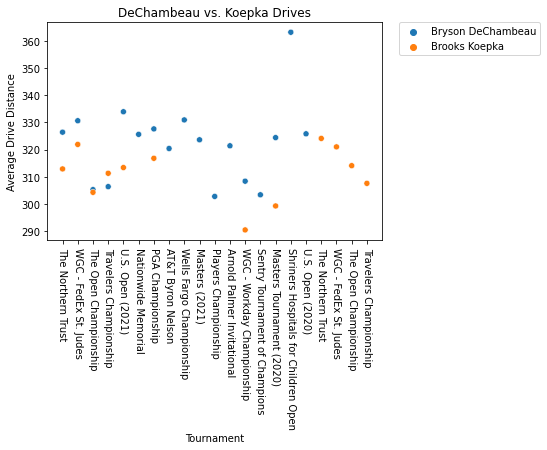

In [9]:
brooksy = df[df['PLAYER NAME'] == 'Brooks Koepka']
chambeau_vs_brooksy = pd.concat([chambeau_only, brooksy], axis=0)

ax = sns.scatterplot(data=chambeau_vs_brooksy, x="Date", y="AVG.", hue="PLAYER NAME")
ax.tick_params(axis='x', rotation=270)
plt.ylabel('Average Drive Distance')
plt.xlabel('Tournament')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("DeChambeau vs. Koepka Drives")
ax.set_xticklabels(chambeau_vs_brooksy['TOURNAMENT'])

In [10]:
# DeChambeau vs. Koepka average drive
print(round(np.average(chambeau_only['AVG.']),2), 'yards')
print(round(np.average(brooksy['AVG.']),2), 'yards')

322.35 yards
311.43 yards


In [11]:
# Actually, let's check out the average for the whole spread.
dfaverage = np.average(df['AVG.'])
print('Average: ', dfaverage, 'yards')
# Let's do a few more summary statistics too...
dfmedian = np.median(df['AVG.'])
dfstd = np.std(df['AVG.'])
dfcorrcoef = np.corrcoef(df['AVG.'])
dfmin = np.min(df['AVG.'])
dfmax = np.max(df['AVG.'])
print('Median: ', round(dfmedian,2), 'yards')
print('Standard deviation: ', round(dfstd, 2), 'yards')
print('Correlation coefficient: ', round(dfcorrcoef, 2), 'yards')
print('Shortest drive: ', round(dfmin, 2), 'yards')
print('Longest drive: ', round(dfmax,2), 'yards')

Average:  297.1961125158028 yards
Median:  296.8 yards
Standard deviation:  13.65 yards
Correlation coefficient:  1.0 yards
Shortest drive:  243.4 yards
Longest drive:  363.1 yards


The longest drive thus far this season is an impressive 363.1 yards. But to whom does it belong?

In [12]:
whose_is_it = df.loc[df['AVG.'] == 363.1]
whose_is_it

,RANK THIS WEEK,PLAYER NAME,ROUNDS,AVG.,TOTAL DISTANCE,TOTAL DRIVES,TOURNAMENT,Date,Type
2824,1,Bryson DeChambeau,4,363.1,"2,905",8,Shriners Hospitals for Children Open,October 11,Standard


Nice, it does belong to our boy!

As we calculated above, Bryson DeChambeau's *average* drive this season is 322.35294117647067 yards. How does that compare to the tour average? Is it significantly longer?

In [13]:
chambeau_mean = 322.35294117647067
tour_mean = 297.1961125158028

chambeau_std = np.std(chambeau_only['AVG.'])
tour_std = 13.650863304504332

tstat, pval = ttest_ind((df['AVG.']), (chambeau_only['AVG.']))
print(pval)

4.7304068055102355e-14


So how many standard deviations higher than the average is BdC?

How about his impressive 363 yard drive? How does that compare?

In [14]:
leftover = chambeau_mean - tour_mean
standard_deez_nuts = leftover/(tour_std)
print(round(standard_deez_nuts, 2))

leftover2 = 363.1 - tour_mean
standard_deez_nuts2 = leftover2/(tour_std)
print(round(standard_deez_nuts2, 2))

1.84
4.83


Impressive work Bryson! Like *insanely* impressive.

Now, for fun, let's compare everyone's averages to the tour average.

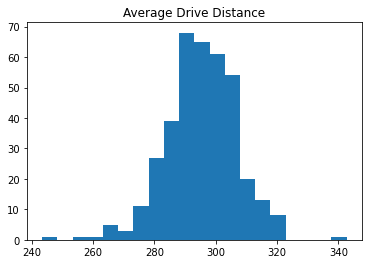

In [15]:
big_averages = df.groupby('PLAYER NAME').mean()
big_averages_real = big_averages['AVG.']

plt.hist(big_averages_real, bins=20)
plt.title("Average Drive Distance")
plt.show()